# Meditation study - data analysis

In this notebook, the data from the meditation study is analyzed according to the following structure:

1. Group size equivalence and demographic homogeneity
2. Descriptive analysis
3. Statistical analysis
4. Exploratory analysis

---

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

---

## Load data
The pre-processed data set is saved in a dataframe `sart_data`.

In [2]:
sart_data = pd.read_csv('full_data.csv')
sart_data

,participant,age,gender,qualification,employment,screentime,socialmedia,computergames,exercise,sleep,...,experience,style,om_errors,com_errors,com_errors_1,com_errors_2,com_errors_3,anticipations,mean_RT,sd_RT
0,7bc52b6a-8df7-49ae-934a-d75c152a38d8.txt,2,1,2,student,3.0,1.0,1,4,3,...,4,CDM,0,9,3,2,4,83,137.655,85.220690
1,5b365e94-8417-43b4-862c-40150a86ae5b.txt,2,1,2,student,3.0,0.0,2,4,3,...,2,CDM,1,8,1,5,2,145,92.170,104.255077
2,be79b70a-dd75-4d1b-ac0f-ac66abec67a4.txt,2,2,2,student,2.0,2.0,3,3,3,...,3,CDM,0,12,5,4,3,82,132.105,75.499761
3,f55c07cf-a046-4c4f-9283-652d1e529dc0.txt,3,1,2,part-time+student,7.0,6.0,2,3,3,...,2,NDM,2,4,1,1,2,63,173.190,130.216681
4,96bf5ec7-406f-4b18-96ec-33f10046b0d5.txt,2,1,2,student,4.0,2.0,1,1,4,...,0,Non-Meditators,0,9,1,5,3,117,119.695,87.188715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,44c76f29-0a42-4c3c-a182-24db2b3e9b18.txt,2,1,2,student,5.0,4.5,2,3,3,...,0,Non-Meditators,0,13,4,5,4,121,114.405,79.601388
136,7e15f090-b453-4393-8ebd-d4e6b552bbe1.txt,2,1,4,part-time+student,2.0,2.0,1,4,3,...,2,CDM,1,3,2,0,1,115,105.875,81.814543
137,fe06bf67-6b0a-4d44-a1a8-a6ff77aaf5da.txt,2,1,2,student,4.0,2.0,1,4,3,...,3,CDM,0,2,1,0,1,27,165.385,70.347898
138,fe327b9b-c21f-48d1-95cc-aff170ad8a65.txt,2,1,2,student,4.0,3.0,1,4,1,...,0,Non-Meditators,13,15,5,2,8,25,369.565,236.014419


---

## Group size equivalence and demographic homogeneity
### Group size equivalence
Determine the number of participants per group.

In [3]:
# Group participants per group
exp_groups = sart_data.groupby(['style'], sort=True).size().reset_index(name='Count')
exp_groups

,style,Count
0,ADM,4
1,CDM,62
2,NDM,4
3,Non-Meditators,70


The ADM and NDM groups have an insufficient number of participants (4 each).

Since many statistical tests require balanced group sizes, the data from these two groups are removed and not considered for further analysis.

In [4]:
# Remove data from ADM and NDM participants
sart_data = sart_data.drop(sart_data[sart_data['style'] == 'ADM'].index)
sart_data = sart_data.drop(sart_data[sart_data['style'] == 'NDM'].index)

In [5]:
# Participants per group after dropping ADM and NDM meditators
exp_groups = sart_data.groupby(['style'], sort=True).size().reset_index(name='Count')
exp_groups

,style,Count
0,CDM,62
1,Non-Meditators,70


The sample sizes of the CDM and non-meditator groups are sufficient and comparable.

For further analysis, only meditators practicing cognitive-directed methods (CDM) and non-meditators (NM) will be considered.

### Demographic homogeneity¶
Verify that `age`, `gender`, `qualification`, and `employment` are homogeneous between the two groups.
#### Age distribution per group
Inspect the frequencies with a contingency table.

In [6]:
crosstab_age = pd.crosstab(sart_data['style'], sart_data['age'])
crosstab_age

age,2,3,6
style,,,
CDM,52,8,2
Non-Meditators,52,17,1


#### Mann-Whitney *U* test
From the contingency table it can be seen that the data is not normally distributed. Therefore, to test if there is a significant difference in the ordinal variable `age` between the two groups, the Mann-Whitney *U* test (a non-parametric test) is used.

In [7]:
# Separate data into two groups
CDM_age = sart_data[sart_data['style'] == 'CDM']['age']
NM_age = sart_data[sart_data['style'] == 'Non-Meditators']['age']

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(CDM_age, NM_age)

print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 1975.0
P-value: 0.21166596588820585


The p-value is greater than the common significance level of 0.05. Therefore, it can be concluded that there is **no significant difference in the age distribution** between the two groups.

#### Gender distribution per group
Inspect the frequencies with a contingency table.

In [8]:
crosstab_gender = pd.crosstab(sart_data['style'], sart_data['gender'])
crosstab_gender

gender,1,2,3
style,,,
CDM,41,20,1
Non-Meditators,56,14,0


#### Chi-squared-test
To test if there is a significant difference in the categorical variable `gender` between the two groups, the chi-squared test is used.

In [9]:
# Perform Chi-squared test
chi2, p, df, expected = chi2_contingency(crosstab_gender)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {df}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 3.907916821534069
P-value: 0.14171200554772384
Degrees of Freedom: 2
Expected Frequencies:
[[45.56060606 15.96969697  0.46969697]
 [51.43939394 18.03030303  0.53030303]]


The p-value is greater than the common significance level of 0.05. Therefore, it can be concluded that there is **no significant difference in the gender distribution** between the two groups.

#### Qualification distribution per group
Inspect the frequencies with a contingency table.

In [10]:
crosstab_quali = pd.crosstab(sart_data['style'], sart_data['qualification'])
crosstab_quali

qualification,1,2,3,4,5
style,,,,,
CDM,0,55,1,5,1
Non-Meditators,2,51,4,7,6


#### Chi-squared-test
To test if there is a significant difference in the categorical variable `qualification` between the two groups, the chi-squared test is used.

In [11]:
# Perform Chi-squared test
chi2, p, df, expected = chi2_contingency(crosstab_quali)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {df}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 7.398030481821458
P-value: 0.11629068963883346
Degrees of Freedom: 4
Expected Frequencies:
[[ 0.93939394 49.78787879  2.34848485  5.63636364  3.28787879]
 [ 1.06060606 56.21212121  2.65151515  6.36363636  3.71212121]]


The p-value is greater than the common significance level of 0.05. Therefore, it can be concluded that there is **no significant difference in the qualification distribution** between the two groups.

#### Employment distribution per group
Inspect the frequencies with a contingency table.

In [12]:
crosstab_employ = pd.crosstab(sart_data['style'], sart_data['employment'])
crosstab_employ

employment,full-time,part-time,part-time+student,self-employed,self-employed+student,student,student+other,unemployed
style,,,,,,,,
CDM,0,3,9,1,2,45,2,0
Non-Meditators,3,1,9,1,1,53,0,2


#### Chi-squared-test
To test if there is a significant difference in the categorical variable `employment` between the two groups, the chi-squared test is used.

In [13]:
# Perform Chi-squared test
chi2, p, df, expected = chi2_contingency(crosstab_employ)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {df}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 8.532888178312799
P-value: 0.2879534544742554
Degrees of Freedom: 7
Expected Frequencies:
[[ 1.40909091  1.87878788  8.45454545  0.93939394  1.40909091 46.03030303
   0.93939394  0.93939394]
 [ 1.59090909  2.12121212  9.54545455  1.06060606  1.59090909 51.96969697
   1.06060606  1.06060606]]


The p-value is greater than the common significance level of 0.05. Therefore, it can be concluded that there is **no significant difference in the employment distribution** between the two groups.

---

## Descriptive analysis 
### Metrics per group
#### Boxplots showing the median omission errors, commission errors, anticipations, and RT per group as well as variability and outliers

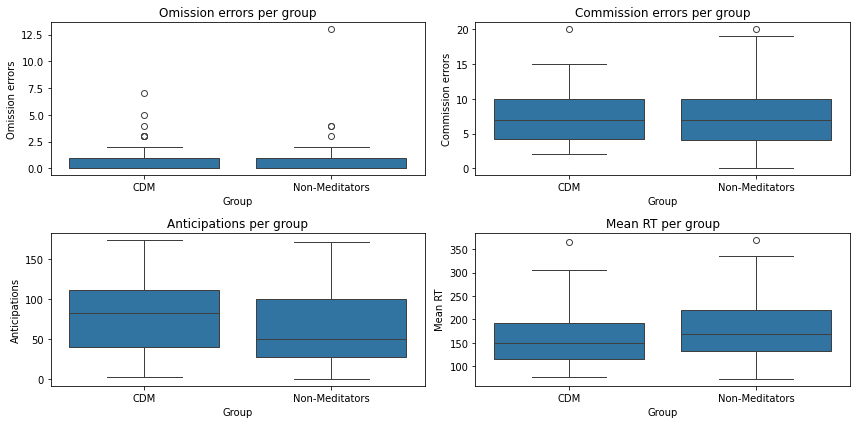

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a boxplot for omission Errors
plt.subplot(2, 2, 1)
sns.boxplot(x='style', y='om_errors', data=sart_data, color='tab:blue')
plt.title('Omission errors per group')
plt.xlabel('Group')
plt.ylabel('Omission errors')

# Create a boxplot for commission Errors
plt.subplot(2, 2, 2)
sns.boxplot(x='style', y='com_errors', data=sart_data, color='tab:blue')
plt.title('Commission errors per group')
plt.xlabel('Group')
plt.ylabel('Commission errors')

# Create a boxplot for anticipations
plt.subplot(2, 2, 3)
sns.boxplot(x='style', y='anticipations', data=sart_data, color='tab:blue')
plt.title('Anticipations per group')
plt.xlabel('Group')
plt.ylabel('Anticipations')

# Create a boxplot for mean RT
plt.subplot(2, 2, 4)
sns.boxplot(x='style', y='mean_RT', data=sart_data, color='tab:blue')
plt.title('Mean RT per group')
plt.xlabel('Group')
plt.ylabel('Mean RT')

# Adjust layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('boxplots.pdf')

# Show the plot
plt.show()

#### Graphic overview of the mean comission errors for each part of the experiment per group

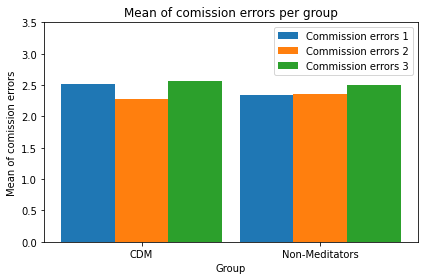

In [15]:
# Calculate the mean of com_errors_1, com_errors_2, and com_errors_3 for each group
grouped_data = sart_data.groupby('style')[['com_errors_1', 'com_errors_2', 'com_errors_3']].mean().reset_index()

# Plotting a bar chart
n_groups = 2

fig, ax = plt.subplots()

# Define the bar width
index = np.arange(n_groups)
bar_width = 0.3

# Adjust error bar properties
error_config = {'ecolor': '0.3'}

# Create bars for each com error
rects1 = ax.bar(index, grouped_data['com_errors_1'], bar_width,
                color='tab:blue',
                error_kw=error_config,
                label='Commission errors 1')

rects2 = ax.bar(index + bar_width, grouped_data['com_errors_2'], bar_width,
                color='tab:orange',
                error_kw=error_config,
                label='Commission errors 2')

rects2 = ax.bar(index + (2*bar_width), grouped_data['com_errors_3'], bar_width,
                color='tab:green',
                error_kw=error_config,
                label='Commission errors 3')

# Adding labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Mean of comission errors')
ax.set_title('Mean of comission errors per group')
ax.set_xticks(index + bar_width)
plt.ylim(0, 3.5)
ax.set_xticklabels(('CDM', 'Non-Meditators'))
ax.legend()

# Show the plot
fig.tight_layout()
plt.show()

# Save the plot as pdf
fig.savefig('com_error_group_part.pdf')

#### Tabular summary of means in omission errors, commission errors, anticipations, mean RT, and sd RT per group

In [16]:
grouped_means = sart_data.groupby('style')[['om_errors', 'com_errors', 'com_errors_1', 'com_errors_2', 'com_errors_3', 'anticipations', 'mean_RT', 'sd_RT']].mean()
grouped_means

,om_errors,com_errors,com_errors_1,com_errors_2,com_errors_3,anticipations,mean_RT,sd_RT
style,,,,,,,,
CDM,0.838710,7.354839,2.516129,2.274194,2.564516,78.096774,158.250161,101.046190
Non-Meditators,0.728571,7.200000,2.342857,2.357143,2.500000,62.057143,183.072357,102.169303


#### Tabular summary of standard deviations in omission errors, commission errors, anticipations, and mean RT per group

In [17]:
grouped_sd = sart_data.groupby('style')[['om_errors', 'com_errors', 'com_errors_1', 'com_errors_2', 'com_errors_3', 'anticipations', 'mean_RT']].std()
grouped_sd

,om_errors,com_errors,com_errors_1,com_errors_2,com_errors_3,anticipations,mean_RT
style,,,,,,,
CDM,1.404834,3.807227,1.715330,1.738375,1.887152,43.316491,56.750177
Non-Meditators,1.743904,4.339238,1.864121,1.532600,2.034129,43.353580,65.049789


---

## Statistical analysis
### Test for normal distribution
The use of the independent t-test assumes that the data are normally distributed within the two groups. The Shapiro-Wilk test is employed to test whether the data are normally distributed.

In [18]:
# Split the data into two groups based on 'style'
CDM_data = sart_data[sart_data['style'] == 'CDM']
NM_data = sart_data[sart_data['style'] == 'Non-Meditators']

# Variables to check for normality
variables = ['om_errors', 'com_errors', 'anticipations', 'mean_RT']

# Perform Shapiro-Wilk test for CDM group
print("Shapiro-Wilk Test for CDM Group:")
for var in variables:
    if var in CDM_data.columns:
        stat, p_value = shapiro(CDM_data[var].dropna())
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')
print("\n")

# Perform Shapiro-Wilk test for Non-Meditators group
print("Shapiro-Wilk Test for Non-Meditators Group:")
for var in variables:
    if var in NM_data.columns:
        stat, p_value = shapiro(NM_data[var].dropna())
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')

Shapiro-Wilk Test for CDM Group:
om_errors: Statistic = 0.6598843336105347, p-value = 1.032357116459437e-10
com_errors: Statistic = 0.9415878057479858, p-value = 0.005357861518859863
anticipations: Statistic = 0.9695890545845032, p-value = 0.1266755610704422
mean_RT: Statistic = 0.9191399812698364, p-value = 0.0005687428638339043


Shapiro-Wilk Test for Non-Meditators Group:
om_errors: Statistic = 0.4255163073539734, p-value = 4.458252462271077e-15
com_errors: Statistic = 0.9591442346572876, p-value = 0.02246110886335373
anticipations: Statistic = 0.9403409361839294, p-value = 0.0023369609843939543
mean_RT: Statistic = 0.9473162889480591, p-value = 0.005259326193481684


The Shapiro-Wilk test checks the null hypothesis that the data are normally distributed. If the p-value is less than 0.05, the null hypothesis is rejected, suggesting that the data are not normally distributed.

**CDM Group**

- **Omission errors**: The p-value is much less than 0.05, indicating that the data for `om_errors` in the CDM group are **not normally distributed**.
- **Commission errors**: The p-value is less than 0.05, indicating that the data for `com_errors` in the CDM group are **not normally distributed**.
- **Anticipations**: The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Thus, the data for `anticipations` in the CDM group can be considered **normally distributed**.
- **RT**: The p-value is less than 0.05, indicating that the data for `mean_RT` in the CDM group are **not normally distributed**.

**Non-Meditators Group**

- **Omission errors**: The p-value is much less than 0.05, indicating that the data for `om_errors` in the Non-Meditators group are **not normally distributed**.
- **Commission errors**: The p-value is less than 0.05, indicating that the data for `com_errors` in the Non-Meditators group are **not normally distributed**.
- **Anticipations**: The p-value is less than 0.05, indicating that the data for `anticipations` in the Non-Meditators group are **not normally distributed**.
- **RT**: The p-value is less than 0.05, indicating that the data for `mean_RT` in the Non-Meditators group are **not normally distributed**.

**Summary**

- For the CDM Group, only `anticipations` data are normally distributed. All other variables are not normally distributed.
- For the Non-Meditators Group, none of the variables are normally distributed.

### Graphic test for normal distribution
In addition to the Shapiro-Wilk test, histograms and Q-Q plots are plotted to visually assess normality.

Plots for CDM Group:


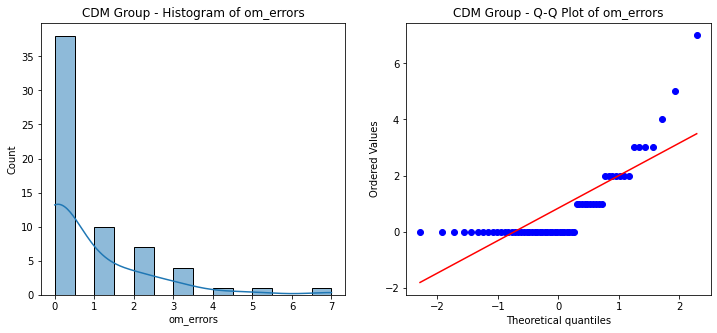

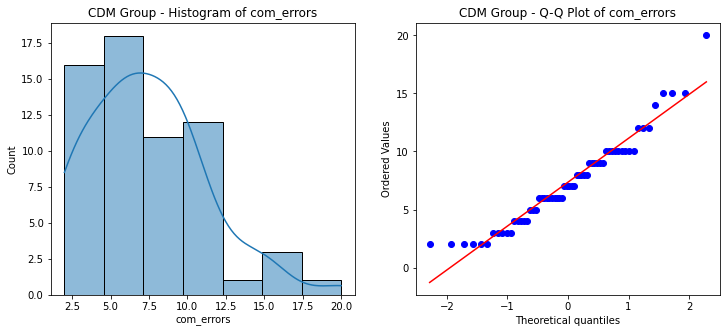

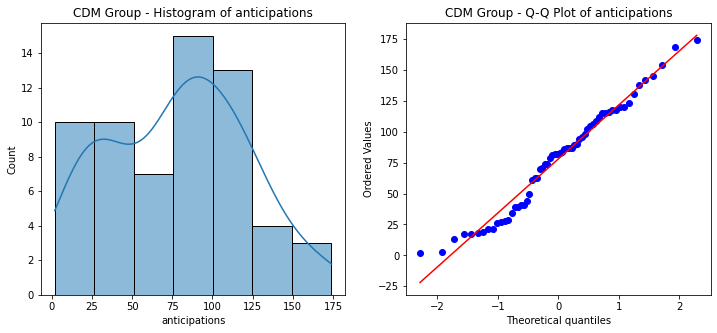

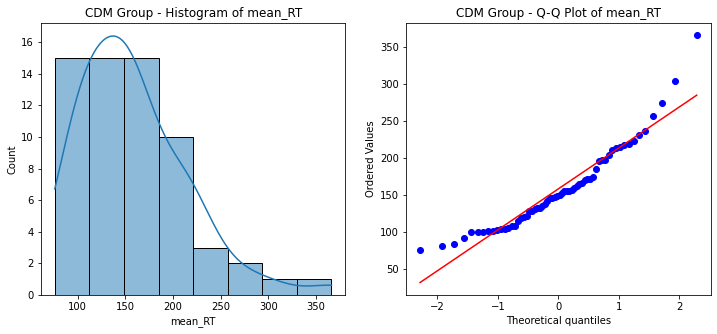

Plots for Non-Meditators Group:


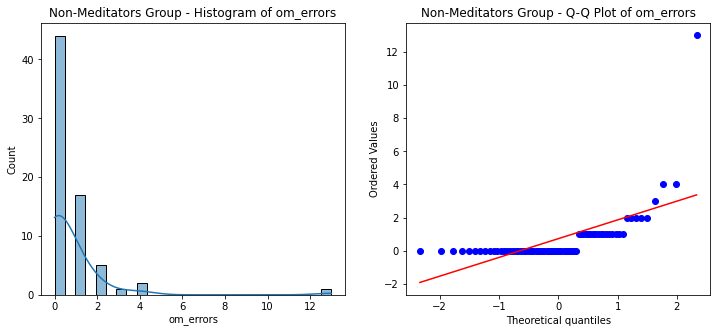

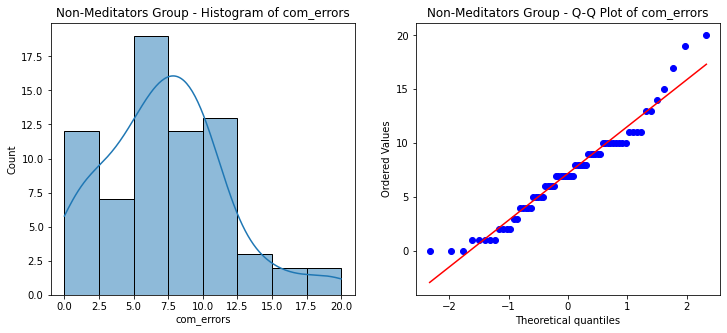

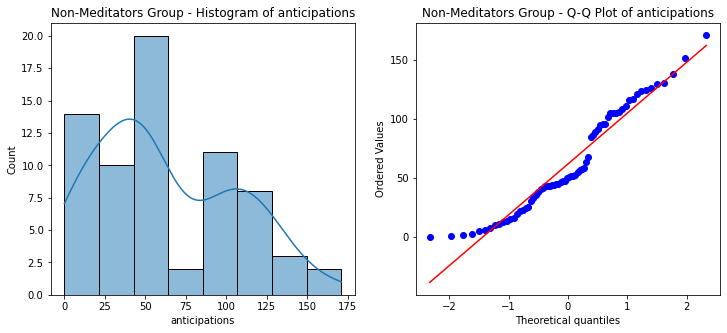

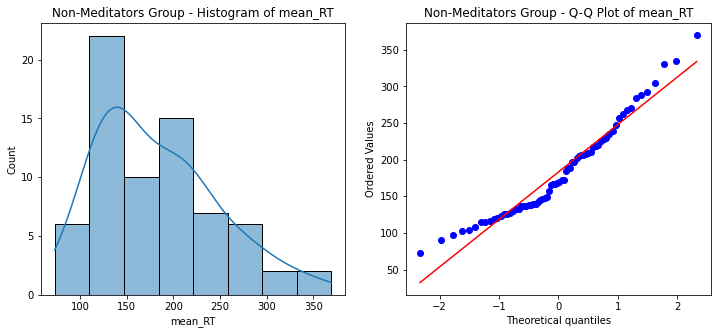

In [19]:
# Histograms and Q-Q plots for CDM group
print("Plots for CDM Group:")
for var in variables:
    if var in CDM_data.columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(CDM_data[var].dropna(), kde=True)
        plt.title(f'CDM Group - Histogram of {var}')

        plt.subplot(1, 2, 2)
        stats.probplot(CDM_data[var].dropna(), dist="norm", plot=plt)
        plt.title(f'CDM Group - Q-Q Plot of {var}')

        plt.show()

# Histograms and Q-Q plots for Non-Meditators group
print("Plots for Non-Meditators Group:")
for var in variables:
    if var in NM_data.columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(NM_data[var].dropna(), kde=True)
        plt.title(f'Non-Meditators Group - Histogram of {var}')

        plt.subplot(1, 2, 2)
        stats.probplot(NM_data[var].dropna(), dist="norm", plot=plt)
        plt.title(f'Non-Meditators Group - Q-Q Plot of {var}')

        plt.show()

Given that many of the variables are not normally distributed, using parametric tests (which assume normality) might not be appropriate. Instead, the Mann-Whitney *U* test, a non-parametric test (which does not assume normality), is used to compare the two groups.

### Mann-Whitney *U* tests
Mann-Whitney *U* tests are performed to determine significant differences in error rates, anticipations, and mean RTs between the two groups.

In [20]:
# Variables to test
var_mwu = ['om_errors', 'com_errors', 'com_errors_1', 'com_errors_2', 'com_errors_3', 'anticipations', 'mean_RT']

# Perform Mann-Whitney U test
print("Mann-Whitney U Test Results:")
for var in var_mwu:
    if var in CDM_data.columns and var in NM_data.columns:
        stat, p_value = mannwhitneyu(CDM_data[var].dropna(), NM_data[var].dropna(), alternative='two-sided')
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')

Mann-Whitney U Test Results:
om_errors: Statistic = 2277.5, p-value = 0.5734407888161505
com_errors: Statistic = 2205.5, p-value = 0.8727124957207193
com_errors_1: Statistic = 2302.0, p-value = 0.5413841509488531
com_errors_2: Statistic = 2073.0, p-value = 0.6540926271202876
com_errors_3: Statistic = 2230.0, p-value = 0.7830717706866275
anticipations: Statistic = 2592.0, p-value = 0.05460680089741045
mean_RT: Statistic = 1677.5, p-value = 0.024878057665260477


**Interpretation of Mann-Whitney *U* test results**

- **No significant difference in the error rates** betweeen the two groups.
- No significant difference in anticipations between the two groups for a significance level of 0.05, but **significant difference in anticipations for a significance level of 0.1** (weak evidence).
- **Significant differences in RT** between the two groups.

### Independent t-test
Anticipations are normally distributed. An independent t-test is performed to determine a significant difference in `anticipations` between the two groups.

In [21]:
# Separate data into two groups
CDM_anticipation = sart_data[sart_data['style'] == 'CDM']['anticipations']
NM_anticipation = sart_data[sart_data['style'] == 'Non-Meditators']['anticipations']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(CDM_anticipation, NM_anticipation)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.122274956098658
P-value: 0.0357113780883493


The p-value of 0.036 suggests that there is a **significant difference** in `anticipation` between the groups.

### Influence of confounding variables
The potential influence of the confounding variables (`screentime`, `socialmedia`, `computergames`, `exercise`, `sleep` and `mood`) on differences in error rates, anticipations, and RT between the two groups is assessed.

#### Correlation analysis
For the continuous variables `screentime` and `socialmedia` the Spearman correlation (non-parametric version of Pearson correlation) coefficients and p-values are calculated and the correlation matrix is shown.

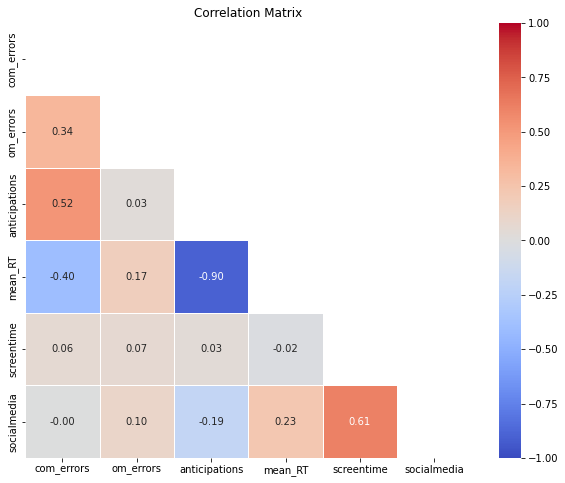


Correlation Coefficients and P-values:
   Variable 1    Variable 2  Correlation Coefficient      P-value
   com_errors     om_errors                 0.341751 6.058565e-05
   com_errors anticipations                 0.516653 2.273793e-10
   com_errors       mean_RT                -0.402161 1.753509e-06
   com_errors    screentime                 0.060321 4.920406e-01
   com_errors   socialmedia                -0.002800 9.745830e-01
    om_errors anticipations                 0.028764 7.433673e-01
    om_errors       mean_RT                 0.165450 5.797465e-02
    om_errors    screentime                 0.068336 4.362387e-01
    om_errors   socialmedia                 0.102973 2.400175e-01
anticipations       mean_RT                -0.902883 1.673738e-49
anticipations    screentime                 0.031576 7.192834e-01
anticipations   socialmedia                -0.186731 3.204415e-02
      mean_RT    screentime                -0.020503 8.154894e-01
      mean_RT   socialmedia         

In [22]:
# Calculate the correlation matrix for the relevant variables
variables = ['com_errors', 'om_errors', 'anticipations', 'mean_RT', 'screentime', 'socialmedia']
correlation_matrix = sart_data[variables].corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Save the heatmap as a PDF file
plt.savefig('correlation.pdf')

# Show the heatmap
plt.show()

# Calculate correlation coefficients and p-values
def calculate_correlation_and_pvalue(x, y):
    return stats.spearmanr(x, y)

results = []
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i < j:  # To avoid duplicate comparisons
            coef, p_value = calculate_correlation_and_pvalue(sart_data[var1], sart_data[var2])
            results.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlation Coefficient': coef,
                'P-value': p_value
            })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
            
# Display the table
print("\nCorrelation Coefficients and P-values:")
print(results_df.to_string(index=False))

#### Interpretation of correlation analysis

***Influence of*** `screentime`
    
No significant correlations found.
    
***Influence of*** `socialmedia`
- commission errors: no significant correlation
- omission errors: no significant correlation
- anticipations: very weak negative correlation (-0.19), statistically significant (0.03) ⟶ higher social media usage is associated with fewer anticipations
- RT: weak positive correlation (0.23), statistically significant (0.009) ⟶ higher social media usage is associated with longer mean reaction time

**Social media usage shows a weak but statistically significant influence on** `anticipations` **and** `mean_RT`. In contrast, screen time does not exhibit any significant correlations with the dependent variables.

#### Stratified Mann-Whitney *U* tests
To check for a potential influence of the categorical variables `computergames`, `exercise`, `sleep`, or `mood` on differences between meditators and non-meditators, stratified Mann-Whitney *U* tests (variables are not normally distributed) are conducted.

Stratified analysis involves dividing the data into strata (subgroups) based on levels of the confounding variable.

In [23]:
# Define the confounding variables
confounding_variables = ['computergames', 'exercise', 'sleep', 'mood']

# Define the groups to compare (CDM vs Non-Meditators)
CDM_data = sart_data[sart_data['style'] == 'CDM']
NM_data = sart_data[sart_data['style'] == 'Non-Meditators']

# Variables to test using Mann-Whitney U test
var_mwu = ['om_errors', 'com_errors', 'anticipations', 'mean_RT']

# Perform Mann-Whitney U test stratified by each confounding variable
for conf_var in confounding_variables:
    # Get unique values of the confounding variable
    conf_var_levels = sart_data[conf_var].unique()
    
    print(f"\nMann-Whitney U Test Results stratified by {conf_var}:")
    
    for level in conf_var_levels:
        # Split data into two groups based on 'style' and the current level of conf_var
        CDM_subgroup = CDM_data[CDM_data[conf_var] == level]
        NM_subgroup = NM_data[NM_data[conf_var] == level]
        
        # Perform Mann-Whitney U test for each variable of interest
        for var in var_mwu:
            if var in CDM_subgroup.columns and var in NM_subgroup.columns:
                CDM_values = CDM_subgroup[var].dropna()
                NM_values = NM_subgroup[var].dropna()
                
                # Check if both groups have data before performing the test
                if len(CDM_values) > 0 and len(NM_values) > 0:
                    stat, p_value = mannwhitneyu(CDM_values, NM_values, alternative='two-sided')
                    print(f'Level {level}: {var}: Statistic = {stat}, p-value = {p_value}')
                else:
                    print(f'Level {level}: {var}: Insufficient data for Mann-Whitney U test')


Mann-Whitney U Test Results stratified by computergames:
Level 1: om_errors: Statistic = 1240.5, p-value = 0.41407780309940023
Level 1: com_errors: Statistic = 1198.0, p-value = 0.6929500813103389
Level 1: anticipations: Statistic = 1396.5, p-value = 0.06385419713801621
Level 1: mean_RT: Statistic = 888.0, p-value = 0.06027943096108894
Level 2: om_errors: Statistic = 104.5, p-value = 1.0
Level 2: com_errors: Statistic = 89.5, p-value = 0.5094397902002716
Level 2: anticipations: Statistic = 125.5, p-value = 0.3826158589359915
Level 2: mean_RT: Statistic = 76.0, p-value = 0.21355772865776912
Level 3: om_errors: Statistic = 6.0, p-value = 1.0
Level 3: com_errors: Statistic = 6.5, p-value = 1.0
Level 3: anticipations: Statistic = 4.0, p-value = 0.6285714285714286
Level 3: mean_RT: Statistic = 7.0, p-value = 0.8571428571428571

Mann-Whitney U Test Results stratified by exercise:
Level 4: om_errors: Statistic = 535.5, p-value = 0.40333263162951216
Level 4: com_errors: Statistic = 575.5, p-v

#### Interpretation of Mann-Whitney *U* test results

***Computergames***

None of the p-values are below the common significance threshold (0.05) for none of the 3 levels, indicating no statistically significant differences between `CDM` and `Non-Meditators` and no influence of the variable `computergames`.

***Exercise***
- Only for level 3 ("once a week"), the variable `om_errors` shows a significant difference (p-value = 0.018), suggesting a difference in omission errors between the two groups at this exercise level. No significant differences in other variables.
- There is no significant difference in any of the variables between the two groups for levels 2 and 4.
- For level 1 ("I don't exercise"), there is insufficient data for testing.

***Sleep***
- Level 3 (<=8 hours): The variables `anticipations` (p-value = 0.046) and `mean_RT` (p-value = 0.031) show significant differences, suggesting a difference between the groups for these variables. No significant differences in other variables.
- There is no significant difference in any of the variables between the two groups for levels 1, 2, and 4.
- For level 5 (> 9hours) there is insufficient data for testing.

***Mood***
- Level 2: The variable `com_errors` (p-value = 0.035) shows significant difference, suggesting a difference in commission errors between the groups at this mood level. No significant differences in other variables.
- There is no significant difference in any of the variables between the two groups for levels 3, 4, 5, 6, 7, 8, 9.
- For level 10 there is insufficient data for testing.

#### Summary of results
- Exercise Level 3: The significant difference in `om_errors` indicates that **exercise might influence the number of omission errors differently between meditators and non-meditators**.
- Sleep Level 3: Significant differences in `anticipations` and `mean_RT` suggest that **sleep duration may impact anticipations and reaction times differently between the groups**.
- Mood Level 2: The significant difference in `com_errors` suggests that **mood might influence commission errors between the two groups**.

The results indicate that **exercise, sleep, and mood could potentially moderate the differences in SART performance between 'CDM' and 'Non-Meditators'**.

---

## Exploratory analysis
**Differences within the CDM group with regard to regularity, experience, and duration**: To ascertain whether there are differences in SART performance between different groups of meditators, further analyses are conducted. Meditators with varying levels of experience, regularity, and duration of practice are compared.
### Experience
#### Frequencies in experience groups

In [24]:
exp_groups_2 = sart_data.groupby(['experience'], sort=True).size().reset_index(name='Count')
exp_groups_2

,experience,Count
0,0,70
1,1,9
2,2,19
3,3,21
4,4,13


#### Tabular summary of means in omission errors, commission errors, anticipations, and mean RT per group

In [25]:
grouped_means_2 = sart_data.groupby('experience')[['om_errors', 'com_errors', 'com_errors_1', 'com_errors_2', 'com_errors_3', 'anticipations', 'mean_RT']].mean()
grouped_means_2

,om_errors,com_errors,com_errors_1,com_errors_2,com_errors_3,anticipations,mean_RT
experience,,,,,,,
0,0.728571,7.200000,2.342857,2.357143,2.500000,62.057143,183.072357
1,1.111111,7.111111,2.222222,2.000000,2.888889,64.777778,183.191667
2,1.421053,8.105263,2.789474,2.684211,2.631579,82.947368,174.316579
3,0.428571,6.761905,2.619048,2.095238,2.047619,75.285714,145.662619
4,0.461538,7.384615,2.153846,2.153846,3.076923,84.769231,137.835000


#### Test for normal distribution

The Shapiro-Wilk test is employed to test whether the data are normally distributed.

In [26]:
# Split the data into four groups based on 'experience'
exp_1_data = sart_data[sart_data['experience'] == 1]
exp_2_data = sart_data[sart_data['experience'] == 2]
exp_3_data = sart_data[sart_data['experience'] == 3]
exp_4_data = sart_data[sart_data['experience'] == 4]

# Variables to check for normality
variables = ['om_errors', 'com_errors', 'anticipations', 'mean_RT']

# Perform Shapiro-Wilk test for group with experience level 1
print("Shapiro-Wilk Test for group with experience level 1:")
for var in variables:
    if var in exp_1_data.columns:
        stat, p_value = shapiro(exp_1_data[var].dropna())
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')
print("\n")

# Perform Shapiro-Wilk test for group with experience level 2
print("Shapiro-Wilk Test for group with experience level 2:")
for var in variables:
    if var in exp_2_data.columns:
        stat, p_value = shapiro(exp_2_data[var].dropna())
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')
print("\n")
        
# Perform Shapiro-Wilk test for group with experience level 3
print("Shapiro-Wilk Test for group with experience level 3:")
for var in variables:
    if var in exp_3_data.columns:
        stat, p_value = shapiro(exp_3_data[var].dropna())
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')
print("\n")

# Perform Shapiro-Wilk test for group with experience level 4
print("Shapiro-Wilk Test for group with experience level 4:")
for var in variables:
    if var in exp_4_data.columns:
        stat, p_value = shapiro(exp_4_data[var].dropna())
        print(f'{var}: Statistic = {stat}, p-value = {p_value}')

Shapiro-Wilk Test for group with experience level 1:
om_errors: Statistic = 0.827140212059021, p-value = 0.041472118347883224
com_errors: Statistic = 0.8206983208656311, p-value = 0.03508966043591499
anticipations: Statistic = 0.9154460430145264, p-value = 0.35587266087532043
mean_RT: Statistic = 0.8988550901412964, p-value = 0.24543850123882294


Shapiro-Wilk Test for group with experience level 2:
om_errors: Statistic = 0.7406470775604248, p-value = 0.0001768945949152112
com_errors: Statistic = 0.9267927408218384, p-value = 0.15112519264221191
anticipations: Statistic = 0.9034346342086792, p-value = 0.05615838244557381
mean_RT: Statistic = 0.9183183908462524, p-value = 0.10535158962011337


Shapiro-Wilk Test for group with experience level 3:
om_errors: Statistic = 0.5679951906204224, p-value = 9.200313684232242e-07
com_errors: Statistic = 0.9482300281524658, p-value = 0.31525102257728577
anticipations: Statistic = 0.9178658127784729, p-value = 0.07866501808166504
mean_RT: Statistic 

**Interpretation of the Shapiro-Wilk test results**

Group with experience level 1
- **Omission errors**: The p-value is less than 0.05, indicating that the data for `om_errors` in the experience level 1 group are **not normally distributed**.
- **Commission errors**: The p-value is less than 0.05, indicating that the data for `com_errors` in the experience level 1 group are **not normally distributed**.
- **Anticipations**: The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. Thus, the data for `anticipations` in the experience level 1 group can be considered **normally distributed**.
- **RT**: The p-value is greater than 0.05. Thus, the data for `mean_RT` in the experience level 1 group can be considered **normally distributed**.

Group with experience level 2
- **Omission errors**: The p-value is much less than 0.05, indicating that the data for `om_errors` in the experience level 2 group are **not normally distributed**.
- **Commission errors**: The p-value is greater than 0.05. Thus, the data for `com_errors` in the experience level 2 group can be considered **normally distributed**.
- **Anticipations**: The p-value is greater than 0.05. Thus, the data for `anticipations` in the experience level 2 group can be considered **normally distributed**.
- **RT**: The p-value is greater than 0.05. Thus, the data for `mean_RT` in the experience level 2 group can be considered **normally distributed**.

Group with experience level 3
- **Omission errors**: The p-value is much less than 0.05, indicating that the data for `om_errors` in the experience level 3 group are **not normally distributed**.
- **Commission errors**: The p-value is greater than 0.05. Thus, the data for `com_errors` in the experience level 3 group can be considered **normally distributed**.
- **Anticipations**: The p-value is greater than 0.05. Thus, the data for `anticipations` in the experience level 3 group can be considered **normally distributed**.
- **RT**: The p-value is greater than 0.05. Thus, the data for `mean_RT` in the experience level 3 group can be considered **normally distributed**.

Group with experience level 4
- **Omission errors**: The p-value is much less than 0.05, indicating that the data for `om_errors` in the experience level 4 group are **not normally distributed**.
- **Commission errors**: The p-value is greater than 0.05. Thus, the data for `com_errors` in the experience level 4 group can be considered **normally distributed**.
- **Anticipations**: The p-value is greater than 0.05. Thus, the data for `anticipations` in the experience level 4 group can be considered **normally distributed**.
- **RT**: The p-value is greater than 0.05. Thus, the data for `mean_RT` in the experience level 3 group can be considered **normally distributed**.

**Implications of the results**

⟶ Kruskal-Wallis *H* test for `om_errors` and `com_errors`

⟶ One-way ANOVA for `anticipations` and `mean_RT`

#### Kruskal-Wallis *H* test (non-parametric alternative to one-way ANOVA)

Determine whether there are statistically significant differences between the means of `om_errors` and `com_errors` between the four groups of the independent variable `experience`.

In [27]:
# Perform Kruskal-Wallis H test for each dependent variable
kruskal_om_errors = stats.kruskal(
    *[sart_data[sart_data['experience'] == exp]['om_errors'] for exp in [1,2,3,4]]
)
kruskal_com_errors = stats.kruskal(
    *[sart_data[sart_data['experience'] == exp]['com_errors'] for exp in [1,2,3,4]]
)

print("Kruskal-Wallis H Test Results")
print("om_errors:", kruskal_om_errors)
print("com_errors:", kruskal_com_errors)

Kruskal-Wallis H Test Results
om_errors: KruskalResult(statistic=6.915540872592264, pvalue=0.07463905237201801)
com_errors: KruskalResult(statistic=1.2259482664956542, pvalue=0.7467878085921191)


Both p-values are greater than the significance level of 0.05. This indicates **no significant differences in mean error rates between different experience levels within the CDM group**.

#### One-way ANOVA
Determine whether there are statistically significant differences between the means of `anticipations` and `mean_RT` between the four groups of the independent variable `experience`.

In [28]:
# Extract the relevant columns
experience_groups = sart_data['experience']
anticipations = sart_data['anticipations']
mean_RT = sart_data['mean_RT']

# Group the data by experience levels
groups_anticipations = [anticipations[experience_groups == exp] for exp in [1, 2, 3, 4]]
groups_mean_RT = [mean_RT[experience_groups == exp] for exp in [1, 2, 3, 4]]

# Perform one-way ANOVA for anticipations
anova_result_anticipations = stats.f_oneway(*groups_anticipations)

# Perform one-way ANOVA for mean_RT
anova_result_mean_RT = stats.f_oneway(*groups_mean_RT)

anova_results = {
    'anticipations': anova_result_anticipations,
    'mean_RT': anova_result_mean_RT
}

print("One-way ANOVA Results")
print("anticipations:", anova_result_anticipations)
print("mean:RT:", anova_result_mean_RT)

One-way ANOVA Results
anticipations: F_onewayResult(statistic=0.48275257654780646, pvalue=0.6955591194701811)
mean:RT: F_onewayResult(statistic=2.100036753846325, pvalue=0.11008229705971982)


Since both p-values are greater than 0.05, the one-way ANOVA indicates **no significant differences in anticipations and mean RT between different experience levels within the CDM group**.

### Regularity
#### Frequencies in regularity groups

In [29]:
reg_groups_2 = sart_data.groupby(['regularity'], sort=True).size().reset_index(name='Count')
reg_groups_2

,regularity,Count
0,1,70
1,2,44
2,3,3
3,4,7
4,5,8


Group sizes are too small and/ or not equal. Further analyses cannot be performed.

### Duration
#### Frequencies in duration groups

In [30]:
dur_groups_2 = sart_data.groupby(['duration'], sort=True).size().reset_index(name='Count')
dur_groups_2

,duration,Count
0,0,70
1,1,59
2,2,3


Group sizes are too small and/ or not equal. Further analyses cannot be performed.